# Modelos de Classificação

Há vários modelos que podem ser feitos para classificar as variáveis de forma binária

## Regressão Logística

Normalmente utilizada quando os dados seguem uma tendência sigmoide na classificação deles
A probabilidade de ser de cada um dos grupos é uma função logística
Só funciona quando é binário

In [18]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
# reg.fit(X_train, y_train)
# y_pred = reg.predict(X_test)

## Naive Bayes

É baseado no teorema de Bayes, com hipótese de independência de cada variável
É rápido, mas considerado um estimador ruim

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# gnb.fit(X_train, y_train)
# y_pred = gnb.predict(X_test)

## K-Nearest Neighbours

Ele funciona parecido com o KMeans no sentido de calcular a distância entre cada ponto
O problema é que exige muito do computador e é difícil determinar o valor de K

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)

## Decision Tree

Funciona como uma árvore em que cada galho pode ser entendido como um if-else statemente
Classificação final ocorre no final da árvore, pode lidar com números e caracteres
Mas pode ser instável e criar confusões atoa

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
# dtc.fit(X_train, y_train)
# y_pred = dtc.predict(X_test)

## Random Forest

É uma conjunção entre decision trees, em que agrega estimativas entre regressores simples
Utiliza várias subamostras para fazer decision trees 
É difícil de interpretar a de implementar

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
# rfc.fit(X_train, y_train)
# y_pred = rfc.predict(X_test)

## Support Vector Machine (SVM)

Considera uma borda entre os diferentes grupos e a escolhe maximizando a distância entre os grupos
Pode ser usado em classificação e numéricos e Support Vector Classifier (SVC) é para classificação

In [23]:
from sklearn.svm import SVC
svc = SVC()
# svc.fit(X_train, y_train)
# y_pred = svc.predict(X_test)

## Modelos de Classificação na prática

Aqui está um exemplo de como isso pode ser usado em bases de dados de saúde

In [24]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score # Importar a medida de score por acurária
from sklearn.metrics import classification_report # Importar o relatório de classificação
from sklearn.metrics import confusion_matrix # Importar a matriz de confusão
from sklearn.pipeline import Pipeline

In [25]:
# Importação de uma base para diabetes para esquematizar um exemplo

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Informa o cabeçalho das colunas
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# Lê o arquivo utilizando as colunas informadas
df = pd.read_csv(url, names=colunas, skiprows=0, delimiter=',')

Caso haja outra base em Excel, basta importá-lo e desconsiderar o anterior

In [46]:
from google.colab import files
files.upload()

Saving Cópia de df.xlsx to Cópia de df (3).xlsx


{'Cópia de df.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x003>\xfa\xecn\x01\x00\x00\xd4\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

E também alterar o nome na importação do Excel

In [47]:
# df = pd.read_excel("houses.xls")

Aqui, deve-se selecionar quais são as variáveis x e a variável y

In [74]:
X = df[df.columns[2:3]]
Y = df[df.columns[2]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

Não sabemos qual modelo perfomará melhor, então testamos vários e utilizamos a validação cruzada 10-fold
Os folds separam a amostra em n folds que se validam entre si
E vários modelos usando a métrica da acurácia

In [75]:
num_folds = 10
scoring = 'accuracy'

In [76]:
models = []
models.append(('LR', LogisticRegression(solver='newton-cg')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models

[('LR', LogisticRegression(solver='newton-cg')),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC())]

Agora vamos comparar os resultados modelos criados, treinando-os com os dados do conjunto de treino e utilizando a técnica de validação cruzada

In [77]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits = num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


LR: 0.613696 (0.093223)
KNN: 0.960788 (0.032991)
CART: 0.982020 (0.017121)
NB: 0.982020 (0.017121)
SVM: 0.400582 (0.051136)


Vale observar que estes são apenas valores médios de acurácia, sendo prudente também observar a distribuição dos resultados de cada fold da validação cruzada

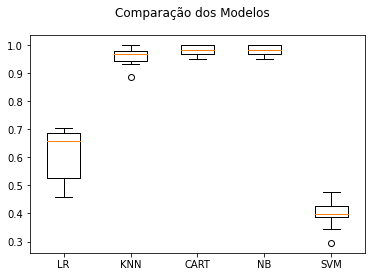

In [78]:
fig = plt.figure()
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Até aqui, verificamos que a Regressão Logística foi o modelo que mostrou melhor acurácia para o problema
Finalizaremos este modelo, treinando-o em todo o conjunto de dados de treinamento (sem validação cruzada) e faremos predições 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


Accuracy score =  0.6818181818181818


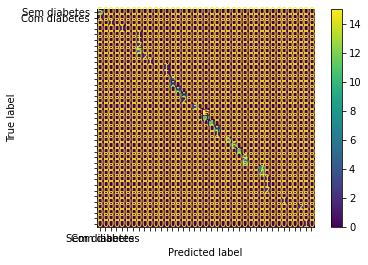

ValueError: ignored

In [82]:
# Preparação do modelo
model = LogisticRegression(solver='newton-cg')
model.fit(X_train, Y_train)

# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print('Accuracy score = ', accuracy_score(Y_test, predictions))

# Matriz de confusão
cm = confusion_matrix(Y_test, predictions)
labels = ['Sem diabetes', 'Com diabetes']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(Y_test, predictions, target_names=labels))

# Modelos Preditivos

Os modelos preditivos são baseados nos modelos de regressão e em geral são feitos em regressão linear

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [84]:
df.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [83]:
lm = LogisticRegression().fit(X_train, Y_train) # Regressão Logística

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [94]:
lm = LinearRegression().fit(X_train, Y_train) # Regressão Linear

In [86]:
lm.coef_

array([1.])

Para deixar os coeficientes de um jeito mais bonito

In [87]:
coefs = pd.DataFrame(lm.coef_, X.columns, columns = ["Coeficientes"])
coefs

,Coeficientes
pres,1.0


Podemos também calcular os valores preditos pelo modelo

In [88]:
pred = lm.predict(X_test)
pred

array([6.80000000e+01, 5.00000000e+01, 7.60000000e+01, 6.40000000e+01,
       7.40000000e+01, 7.20000000e+01, 7.00000000e+01, 7.40000000e+01,
       8.20000000e+01, 1.06000000e+02, 6.20000000e+01, 6.80000000e+01,
       8.00000000e+01, 5.40000000e+01, 7.60000000e+01, 7.40000000e+01,
       6.60000000e+01, 8.20000000e+01, 2.40000000e+01, 8.40000000e+01,
       6.40000000e+01, 7.40000000e+01, 7.00000000e+01, 5.50000000e+01,
       9.60000000e+01, 6.80000000e+01, 7.00000000e+01, 7.00000000e+01,
       6.80000000e+01, 8.60000000e+01, 6.40000000e+01, 4.60000000e+01,
       5.00000000e+01, 5.00000000e+01, 5.00000000e+01, 8.80000000e+01,
       6.80000000e+01, 8.00000000e+01, 6.00000000e+01, 7.20000000e+01,
       7.20000000e+01, 6.40000000e+01, 6.80000000e+01, 7.20000000e+01,
       5.00000000e+01, 4.80000000e+01, 7.40000000e+01, 4.40000000e+01,
       6.00000000e+01, 6.50000000e+01, 5.80000000e+01, 8.00000000e+01,
       2.84217094e-14, 7.20000000e+01, 8.60000000e+01, 7.00000000e+01,
      

A correlação entre o valor predito e o valor original é

In [95]:
np.corrcoef(pred, Y_test)

array([[1., 1.],
       [1., 1.]])

Realizar também a distribuição dos resíduos, que normalmente tende a se parecer com a normal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


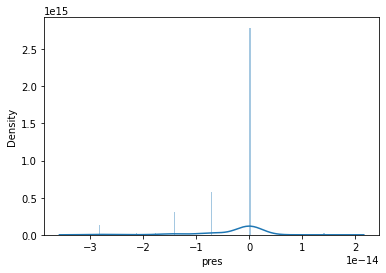

In [96]:
import seaborn as sns
sns.distplot(Y_test - pred, bins = 165)

Também é possível realizar a regressão com outro pacote, que dá a opção de fazer um summary das características gerais da regerssão

In [98]:
import statsmodels.api as sm

In [99]:
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(Y_train, X_train_lm).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [100]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   pres   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.034e+32
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:04:09   Log-Likelihood:                 17963.
No. Observations:                 614   AIC:                        -3.592e+04
Df Residuals:                     612   BIC:                        -3.591e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.331e-15   7.07e-15      0.471      0.6

# Clusterização KMeans

A clusterização também pode ser feita no Python por meio de um código simples

In [ ]:
from sklearn.cluster import KMeans

Primeiramente, coloca-se um range de possíveis número de clusters que deverão ser rodados, aqui, no caso, serão 8

In [ ]:
wcss = []
min_cluster = 1
max_cluster = 8
r = range(min_cluster,max_cluster + 1)

Depois disso, ele calcula a distância dos pontos até o centróide de cada cluster e plota a soma do quadrado dessas distâncias (SSE)

In [ ]:
for k in r:
  KM = KMeans(n_clusters = k, init = "k-means++")
  KM.fit(X)
  wcss.append(KM.inertia_)

plt.plot(r,wcss)
plt.xlabel("Quantidade de cluster")
plt.show

NameError: ignored

A quantidade ideal de cluster será aquela em que há a maior diminuição da distância de cada ponto até o seu centróide. Porém, se decair muito pouco, a quantidade ideal é 1.
Essa quantidade ótima é:

In [ ]:
diff = []
for i in range(0, len(wcss)-1):
  diff.append(wcss[i]-wcss[i+1])
n = diff.index(max(diff)) + 2
n

2

Aqui, selecionamos o número de clusters com base no ótimo n, porém, caso deseja-se um número não ótimo, deve-se mudar o valor de n para outro valor

In [ ]:
AI = KMeans(n_clusters = n)
AI.fit(df)
y = AI.predict(df)

Por fim, adicionamos qual cluster está cada dado no nosso df

In [ ]:
df["Cluster"] = y

In [ ]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class,Cluster
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,0


Por fim, é possível exportar essa planilha para um Excel, que aparecerá na parte de arquivos, na esquerda do Python e depois selecionar os 3 pontinhos e clicar em baixar

In [ ]:
df.to_excel("cluster.xlsx")